In [2]:
import pickle
import pandas as pd
import numpy as np
import librosa
from sklearn.utils import shuffle
from keras.layers import Dense, Dropout, Flatten, Conv1D, Input, MaxPooling1D
from keras.models import Sequential
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras import backend as K
from scipy.io import wavfile
import IPython.display as ipd
from matplotlib import pyplot as plt
from keras.models import load_model

Using TensorFlow backend.


In [2]:
classes={'backward':0,'bed':1,'bird':2,'cat':3,'dog':4,
         'down':5,'eight':6,'five':7,'follow':8,'forward':9,'four':10,
        'go':11,'happy':12,'house':13,'learn':14,'left':15,'marvin':16,
        'nine':17,'no':18,'off':19,'on':20,'one':21,'right':22,'seven':23,
         'sheila':24,'six':25,'stop':26,'three':27,'tree':28,'two':29,
         'up':30,'visual':31,'wow':32,'yes':33,'zero':34}

In [3]:
filehandler = open('data.pkl', 'rb') 
data = pickle.load(filehandler)

In [4]:
filehandler = open('labels.pkl', 'rb') 
labels = pickle.load(filehandler)

In [58]:
l = np.argmax(labels['train'],axis=1)
samples = np.reshape(data['train'][np.argwhere(l==30)],(2579,16000))
means = np.reshape(np.mean(samples,axis=1),(2579,1))
stds = np.reshape(np.std(samples,axis=1),(2579,1))
samples = (samples-means)/stds
samples = samples[100]

In [56]:
samples = np.mean(samples,axis=0)

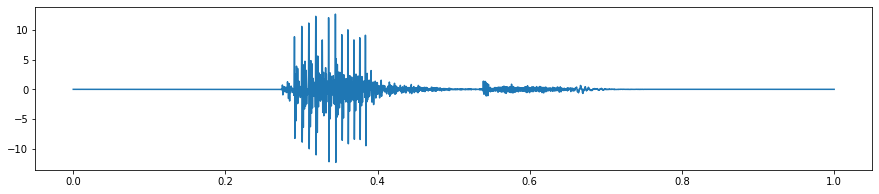

In [59]:
plt.figure(figsize=(15,3))
plt.plot(np.linspace(0, sampling_rate/len(samples), sampling_rate), samples)
plt.show()

Sample rate:  16000


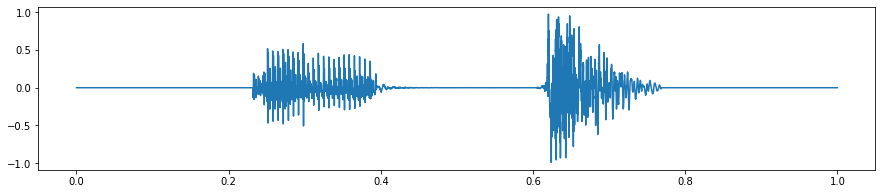

In [60]:
sampling_rate, samples = wavfile.read('./owntest/up.wav')
print('Sample rate: ',sampling_rate)
plt.figure(figsize=(15,3))
plt.plot(np.linspace(0, sampling_rate/len(samples), sampling_rate), samples)
plt.show()

Sample rate:  16000


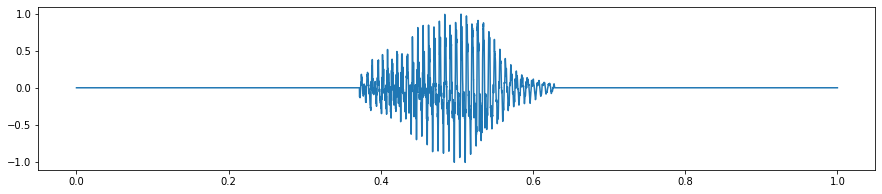

In [61]:
sampling_rate, samples = wavfile.read('./owntest/up1.wav')
print('Sample rate: ',sampling_rate)
plt.figure(figsize=(15,3))
plt.plot(np.linspace(0, sampling_rate/len(samples), sampling_rate), samples)
plt.show()

In [5]:
labels

{'train': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]), 'val': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [1, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]), 'test': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 1, 0],
        [0, 0, 0, ..., 0, 0, 1]])}

In [6]:
drop=0.2

In [7]:
model = Sequential()
model.add(Conv1D(8,17, padding='valid', activation='relu', strides=1,input_shape=(16000,1)))
model.add(MaxPooling1D(3))
model.add(Dropout(drop))
model.add(Conv1D(16,15, padding='valid', activation='relu', strides=1))
model.add(MaxPooling1D(3))
model.add(Dropout(drop))
model.add(Conv1D(32, 13, padding='valid', activation='relu', strides=1))
model.add(MaxPooling1D(3))
model.add(Dropout(drop))
model.add(Conv1D(64, 11, padding='valid', activation='relu', strides=1))
model.add(MaxPooling1D(3))
model.add(Dropout(drop))
model.add(Conv1D(128, 9, padding='valid', activation='relu', strides=1))
model.add(MaxPooling1D(3))
model.add(Dropout(drop))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(drop))
model.add(Dense(256, activation='relu'))
model.add(Dropout(drop))
model.add(Dense(128, activation='relu'))
model.add(Dropout(drop))
model.add(Dense(35,activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 15984, 8)          144       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 5328, 8)           0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 5328, 8)           0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 5314, 16)          1936      
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 1771, 16)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 1771, 16)          0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 1759, 32)         

In [8]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [9]:
epochs=10
bs = 32

In [1]:
prev=0
for e in range(epochs):
    model.fit(data['train'], labels['train'] ,epochs=1, batch_size=bs)
    loss,acc = model.evaluate(data['val'],labels['val'],batch_size=bs)
    print('Validation Accuracy',acc)
    if acc>prev:
        model.save_weights("model.h5")
        prev=acc
    else:
        break
    

NameError: name 'epochs' is not defined

In [11]:
model.load_weights("model.h5")

In [12]:
labels['test']

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 1]])

In [13]:
loss,acc = model.evaluate(data['test'],labels['test'],batch_size=32)
print(acc)

10083/10083 [==============================] - 4s 427us/step
0.8080928325653076


In [14]:
data['test'].shape

(10083, 16000, 1)

In [17]:
arr = []
ll = np.argmax(labels['test'],axis=1)
for (v,k) in enumerate(classes):
    indexes = np.where(ll == v)[0]
    preds = np.argmax(model.predict(data['test'][indexes]),axis=1)
    print(k,'Accuracy',np.count_nonzero(preds == v)/len(preds))
    arr.append(np.count_nonzero(preds == v)/len(preds))

backward Accuracy 0.8364779874213837
bed Accuracy 0.8415300546448088
bird Accuracy 0.6993464052287581
cat Accuracy 0.8154761904761905
dog Accuracy 0.6979166666666666
down Accuracy 0.8164893617021277
eight Accuracy 0.901595744680851
five Accuracy 0.8823529411764706
follow Accuracy 0.6909090909090909
forward Accuracy 0.43537414965986393
four Accuracy 0.6467391304347826
go Accuracy 0.6565934065934066
happy Accuracy 0.8926553672316384
house Accuracy 0.8862275449101796
learn Accuracy 0.6778523489932886
left Accuracy 0.781491002570694
marvin Accuracy 0.8011049723756906
nine Accuracy 0.883289124668435
no Accuracy 0.7789473684210526
off Accuracy 0.8364611260053619
on Accuracy 0.7894736842105263
one Accuracy 0.8021978021978022
right Accuracy 0.825
seven Accuracy 0.9308510638297872
sheila Accuracy 0.865979381443299
six Accuracy 0.9090909090909091
stop Accuracy 0.8943298969072165
three Accuracy 0.6710875331564987
tree Accuracy 0.7668711656441718
two Accuracy 0.7942708333333334
up Accuracy 0.77179

In [18]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

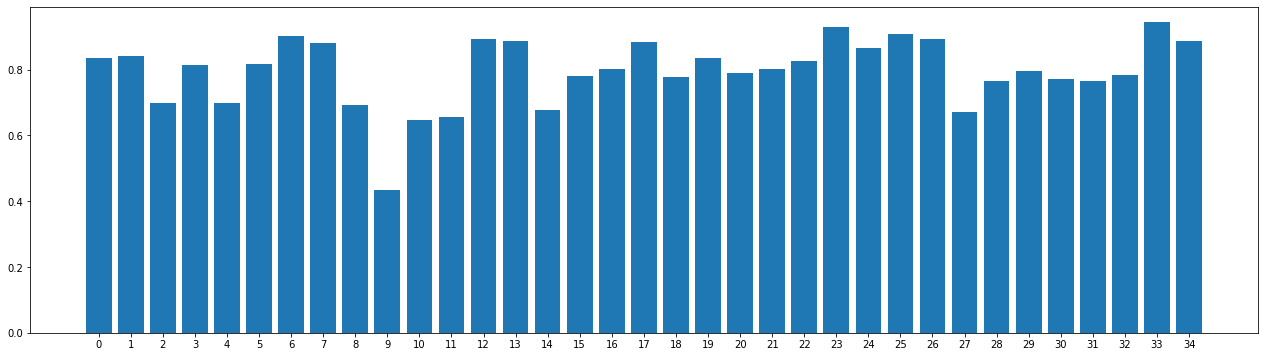

In [23]:
figure(figsize=(22, 6))
plt.bar(np.linspace(0,34,35),arr)
plt.xticks(np.linspace(0,34,35))
plt.show()